<a href="https://colab.research.google.com/github/othniel77/datascience/blob/main/intro_hypothesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving stack_overflow.feather to stack_overflow.feather


# **Tests d'hypothèses et de scores z**

## **Tests A/B**

- En 2013, Electronic Arts (EA) a sorti  SimCity 5.

- Ils voulaient augmenter les précommandes du jeu

- Ils ont utilisé des tests A/B pour tester différents scénarios publicitaires

- Cela implique de diviser les utilisateurs en groupes contrôle et traitement

# **Résultats des tests A/B**

- Le groupe de traitement (sans publicité) a obtenu 43,4 % d'achats en plus que le groupe témoin (avec publicité)

- L'intuition selon laquelle "la diffusion d'une annonce augmenterait les ventes" était fausse
- Ce résultat était-il statistiquement significatifou juste le hasard ?

- Besoin des données d'EA pour déterminer cela

- Techniques de Sampling en Python + ce cours pour le faire


# **Enquête auprès des développeurs Stack Overflow 2020**


In [ ]:
import pandas as pd
stack_overflow = pd.read_feather('/content/stack_overflow.feather')
print(stack_overflow.head())

   respondent                                        main_branch hobbyist  \
0        36.0  I am not primarily a developer, but I write co...      Yes   
1        47.0                     I am a developer by profession      Yes   
2        69.0                     I am a developer by profession      Yes   
3       125.0  I am not primarily a developer, but I write co...      Yes   
4       147.0  I am not primarily a developer, but I write co...       No   

    age  age_1st_code age_first_code_cut comp_freq  comp_total  \
0  34.0          30.0              adult    Yearly     60000.0   
1  53.0          10.0              child    Yearly     58000.0   
2  25.0          12.0              child    Yearly    550000.0   
3  41.0          30.0              adult   Monthly    200000.0   
4  28.0          15.0              adult    Yearly     50000.0   

   converted_comp         country  ...          survey_length trans  \
0         77556.0  United Kingdom  ...  Appropriate in length    No  

## **Faire des hypothèses sur la moyenne**
### Une hypothèse :
La rémunération annuelle moyenne de la population des data scientists est de 110 000 $

### L'estimation ponctuelle (exemple de statistique) :

In [ ]:
mean_comp_samp = stack_overflow['converted_comp'].mean()
mean_comp_samp

119574.71738168952

# **Générer une distribution bootstrap**


In [ ]:
import numpy as np
# Step 3. Repeat steps 1 & 2 many times, appending to a list
so_boot_distn = []
for i in range(5000):
  so_boot_distn.append(
# Step 2. Calculate point estimate
    np.mean(
# Step 1. Resample
        stack_overflow.sample(frac=1, replace=True)['converted_comp']
          )
)
print(so_boot_distn)

[132285.24944714727, 122260.96461742591, 119509.04732419284, 117085.31446262715, 125168.22158337019, 111698.09287925696, 122694.70411322423, 111036.88544891641, 125319.31490490933, 124137.02255639098, 118038.36444051305, 115752.32773109243, 124468.26050420168, 127797.70145953118, 117241.77620521894, 115991.21848739496, 119434.83193277312, 118128.5922158337, 126204.66784608581, 121614.16320212296, 117350.45731977001, 123263.05838124723, 120847.31048208757, 122685.90269792128, 123862.93277310925, 112028.35028748341, 122676.85670057496, 113472.13666519239, 112165.62140645731, 127982.3303847855, 118495.30738611234, 122191.12339672711, 124816.76868642194, 124579.60636886333, 114183.7213622291, 120072.13445378152, 123473.6125608138, 124232.88677576293, 119137.99203892083, 124004.50773993808, 124171.08049535604, 133852.33701901813, 120722.71384343211, 122514.04688191066, 124499.8522777532, 121778.02034498009, 119365.0866873065, 116088.49579831933, 123396.70588235294, 118065.00619195047, 12490

## **Visualiser la distribution bootstrap**

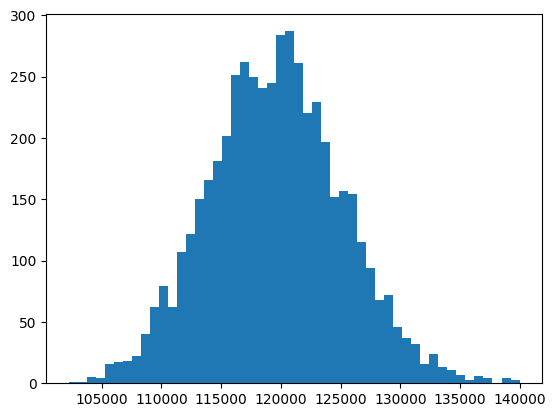

In [ ]:
import matplotlib.pyplot as plt
plt.hist(so_boot_distn, bins=50)
plt.show()


## **Erreur standard**

In [ ]:
std_error = np.std(so_boot_distn, ddof=1)

## **scores z**

In [ ]:
stack_overflow['converted_comp'].mean()

119574.71738168952

In [ ]:
mean_comp_hyp = 110000

In [ ]:
std_error

5589.5581355620125

In [ ]:
z_score = (mean_comp_samp - mean_comp_hyp) / std_error

# **Tester l'hypothèse**
1,707 est-il un nombre haut ou bas ?

C'est le but du cours !

## **Cas d'utilisation du test d'hypothèse :**
Déterminer si les statistiques de l'échantillon sont proches ou éloignées des valeurs attendues (ou « hypothétiques »).


## **Distribution normale standard (z)**

Distribution normale standard: distribution normale avec **moyenne = 0+ écart type = 1**

# **les p-values**





## **Procès criminels**

### Deux vrais états possibles :
1. L'accusé a commis le crime
2. L'accusé n'a pas commis le crime

### Deux verdicts possibles :
1. Coupable
2. Non coupable

Dans un premier temps, le prévenu est présumé non coupable

L'accusation doit présenter des preuves « au-delà de tout doute raisonnable » pour rendre un verdict de culpabilité

## **Âge de la première expérience en programmation**

"age_first_code_cut" : le moment où l'utilisateur de Stack Overflow a commencé à programmer

"adulte" : signifie qu'ils ont commencé à 14 ans ou plus

"enfant" ça veut dire qu'ils ont commencé avant 14 heures

Recherche précédente : 35 % des développeurs de logiciels ont commencé à programmer lorsqu'ils étaient enfants.

Preuve qu'une plus grande proportion de data scientists commencent à programmer dès l'enfance ?


## **Définitions**
Un hypothèse est une déclaration sur un paramètre de population inconnu

Un test d'hypothèseest un test de deux hypothèses concurrentes

L'hypothèse nulle (H0)est l'idée existante

L'hypothèse alternative (H1)est la nouvelle idée « challenger » du chercheur

Pour notre problème :

H0: La proportion de data scientists commençant la programmation lorsqu'ils étaient enfants est de 35 %

H1: La proportion de data scientists commençant la programmation lorsqu'ils étaient enfants est supérieure à 35 %


## **Calcul du score z**

In [ ]:
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()

In [ ]:
prop_child_hyp = 0.35

In [ ]:
stack_overflow1 = stack_overflow['age_1st_code'].mean()
stack_overflow1

14.933215391419726

In [ ]:
from random import sample

first_code_boot_distn = stack_overflow['age_1st_code'].sample(frac=1,replace = True)


In [ ]:
first_code_boot_distn

243     30.0
955     18.0
1844    16.0
1571    15.0
817      9.0
        ... 
395     18.0
1115     8.0
2246    10.0
479     15.0
1508    13.0
Name: age_1st_code, Length: 2261, dtype: float64

In [ ]:
std_error = np.std(first_code_boot_distn, ddof=1)
std_error

4.693335196968497

In [ ]:
z_score = (prop_child_samp - prop_child_hyp) / std_error
z_score

0.008825222160097273

## **Calcul de la valeur p**

In [ ]:
from scipy.stats import norm
1 - norm.cdf(z_score, loc=0, scale=1)


0.49647929144792546

## **Statistique significative**

## **récapitulatif de la valeur p**
Les valeurs p quantifient les preuves de l'hypothèse nulle

Grande valeur p → ne parvient pas à rejeter l'hypothèse nulle

Petite valeur p → rejeter l'hypothèse nulle

Où est le point de coupure ?

## **Niveau de significative**
Le niveau de significative d'un test d'hypothèse (α) est le seuil pour « au-delà de tout doute
raisonnable »

Des valeurs communes de α sont 0,2 , 0,1 , 0,05 ,et 0,01

Si p ≤ α, rejeter H0, sinon je ne rejette pas H0

α devrait être réglé avant pour effectuer le test d'hypothèse

In [ ]:
alpha = 0.05
prop_child_samp = (stack_overflow['age_first_code_cut'] == "child").mean()
prop_child_hyp = 0.35
std_error = np.std(first_code_boot_distn, ddof=1)


In [ ]:
z_score = (prop_child_samp - prop_child_hyp) / std_error

In [ ]:
p_value = 1 - norm.cdf(z_score, loc=0, scale=1)

## **Prendre une décision**

In [ ]:
alpha = 0.05
print(p_value)

0.49647929144792546


In [ ]:
p_value <= alpha

False

## **Intervalles de confiance**

Pour un niveau de signification de α, il est courant de choisir un niveau d'intervalle de confiance de 1 -α

α = 0,05 → 95% Intervalle de confiance

In [ ]:
import numpy as np




In [ ]:
first_code_boot_distn

153     15.0
43      11.0
2231    14.0
1845    20.0
221     33.0
        ... 
877     10.0
2234    11.0
912     14.0
1918    11.0
1227    10.0
Name: age_1st_code, Length: 2261, dtype: float64

In [ ]:
lower = np.quantile(first_code_boot_distn, 0.025)
upper = np.quantile(first_code_boot_distn, 0.975)

print((lower, upper))

(7.0, 25.0)
